<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for immage classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import os
import datetime

## Load data
Use the **Keras**' load method.

In [2]:
# insert code here
(train_data, train_labels), (test_data, test_labels) = datasets.cifar10.load_data()

## Check some data

[]

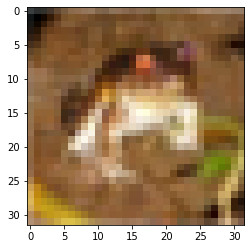

In [3]:
# testing out one picture
plt.imshow(train_data[0])
plt.plot()

In [4]:
# labels are in array form, will need to look inside array to get class number
train_labels[0]

array([6], dtype=uint8)

In [5]:
# create class name based on the index as indicated by labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog'
              , 'horse', 'ship', 'truck']



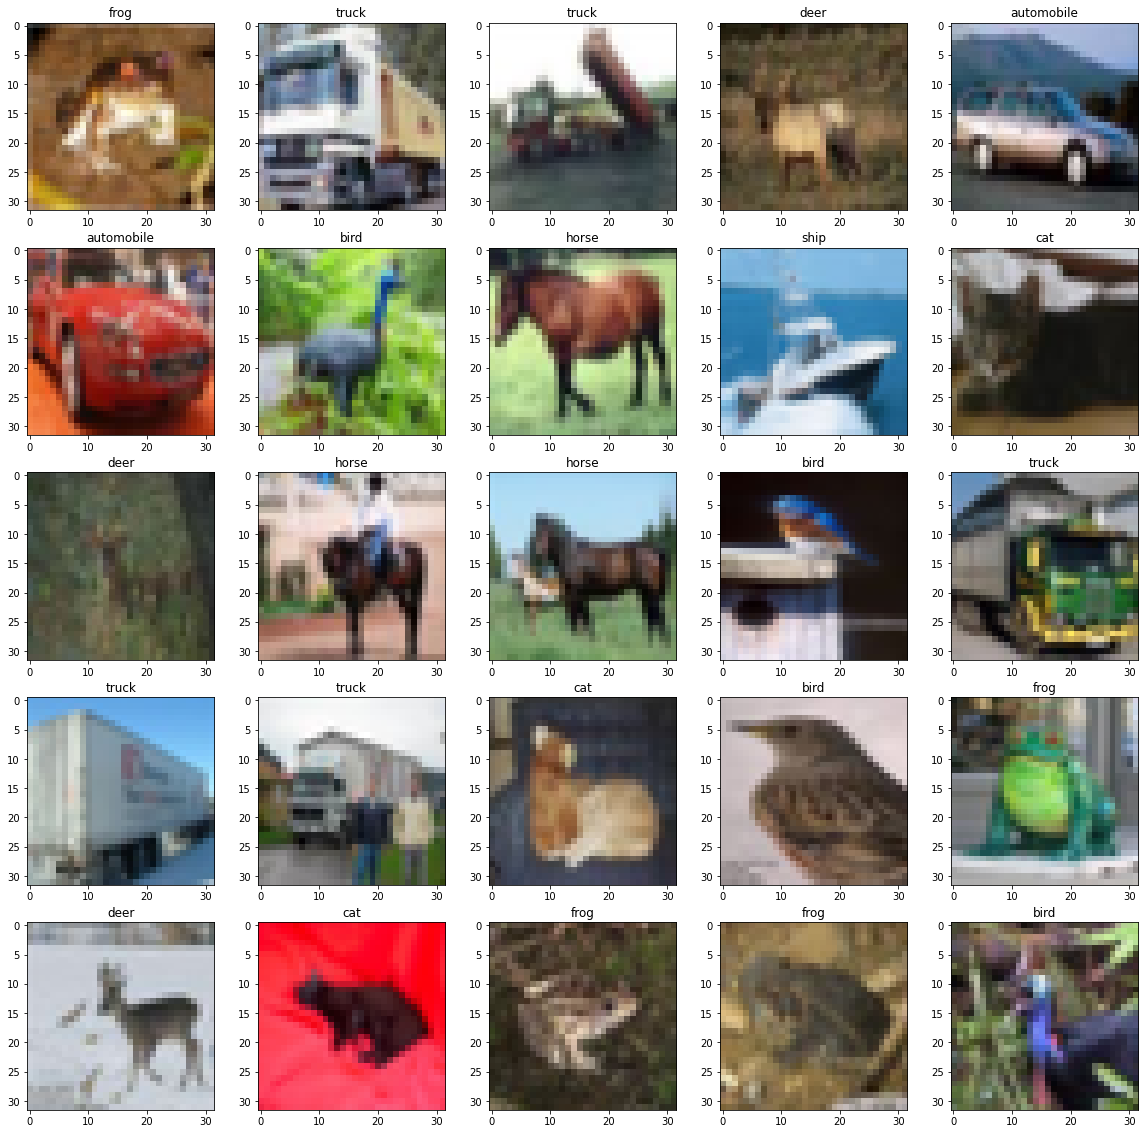

In [6]:
# testing out 25 pictures
fig, axs = plt.subplots(5,5, figsize = (20,20))
counter = 0
for i in range(0,5):
    for j in range(0,5):
        selection = (i*5) + j
        axs[i,j].imshow(train_data[selection])
        axs[i,j].set_title(class_names[train_labels[selection][0]])

## Prepare data

In [7]:
train_labels_cat = train_labels
test_label_cat = test_labels

In [8]:
# insert code here
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [10]:
# insert code here
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

## Compile the model

In [11]:
# insert code here
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the training data

In [12]:
# Uncomment the statement below to allow online monitoring with TensorBoard
logdir = os.path.join("log", 'test_2')
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, update_freq = 'epoch') 
# choose or create a directory for the logs

In [13]:
%%time
# insert code here
base_model = model.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels),
                      callbacks=[tensorboard_callback])
# cdgddgcvdgeygdcvdgyegdcvgdeygdcvdgeydgcvdgeygdcvdgeydgcvgdyedgcv
# ..., callbacks = [tensorboard], ...

Epoch 1/10
1563/1563 [==============================] - 14s 6ms/step - loss: 2.2630 - accuracy: 0.3053 - val_loss: 1.3592 - val_accuracy: 0.5162
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3007 - accuracy: 0.5399 - val_loss: 1.1591 - val_accuracy: 0.5961
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1307 - accuracy: 0.6026 - val_loss: 1.1176 - val_accuracy: 0.6131
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0196 - accuracy: 0.6442 - val_loss: 1.0728 - val_accuracy: 0.6339
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9243 - accuracy: 0.6799 - val_loss: 1.0520 - val_accuracy: 0.6410
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8473 - accuracy: 0.7052 - val_loss: 1.0696 - val_accuracy: 0.6394
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7890 - accuracy: 0.7281 - val_loss: 1.0142 - val_accuracy

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [72]:
%reload_ext tensorboard
%tensorboard --logdir log/fit

Reusing TensorBoard on port 6006 (pid 41884), started 0:00:45 ago. (Use '!kill 41884' to kill it.)

## Create predictions

In [14]:
%%time
predictions = model.predict_classes(test_data)

C:\Users\march\anaconda3\envs\CV\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Wall time: 564 ms


In [25]:
predictions = np.argmax(model.predict(test_data), axis=-1)

In [26]:
#testing out one prediction
predictions

array([5, 8, 8, ..., 5, 1, 7], dtype=int64)

In [18]:
# predicted correctly
test_label_cat[1][0]

8

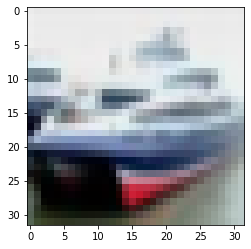

In [20]:
# showing the picture
plt.imshow(test_data[1])

## Evaluate the model

In [102]:
# insert code here
loss, acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.1388 - accuracy: 0.6036


In [103]:
print(f"Loss of the model  is {loss}")
print(f"Accuracy of the model is {acc}")

Loss of the model  is 2.138773202896118
Accuracy of the model is 0.603600025177002


## Visualisation of cost

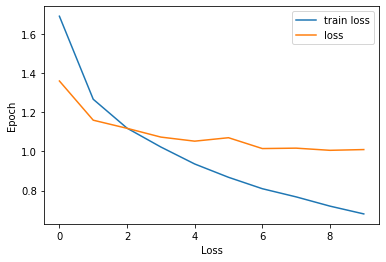

In [27]:
# insert code here
plt.plot(base_model.history['loss'], label='train loss')
plt.plot(base_model.history['val_loss'] ,label='loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend()

## Results

In [ ]:
# see prediction for the results



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



